# **Projections and Wasserstein Barycenters: Basic and Sliced ones**

How to use this notebook?

This notebook helped us to compare the differences between Sliced and Basic Projections and Barycenters

1. Wasserstein distance and Sliced Wasserstein distance 
2. Wasserstein Barycenters
3. Examples of projections (basic + sliced) and creation of a .GIF
4. One example of Wasserstein Barycenter (basic + sliced)

> The functions used in this notebook won't be the ones used for the Texture Mixing because not efficient enough, but we still used them to understand deeply the Wasserstein and Sliced Wasserstein Distances, Barycenters and Projections. A new implementation, less intuitive but more efficient will be used in the following notebooks. 

In [2]:
### Use this cell to be at the root of the project (if needed)
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/marionchabrol/Documents/MVA/wasserstein/experiments
/Users/marionchabrol/Documents/MVA/wasserstein


In [4]:
from utils.image_treatment import preprocess_image, image_to_distribution
from utils.basic_wasserstein import compute_wasserstein_distance, compute_wasserstein_barycenter, compute_wasserstein_sliced_distance, compute_sliced_wass_barycenter, compute_sliced_wass_barycenter_gif
from utils.projections import sliced_projection, simple_projection, resize_array, create_gif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import imageio

In [5]:
### Load images + preprocess
image1 = preprocess_image('data/elephant.jpg', end="L")
image2 = preprocess_image('data/gateau.png', end="L")
image3 = preprocess_image('data/moon.png', end="L")
image4= preprocess_image('data/sun.png', end="L")

x1 = image_to_distribution(image1)
x2 = image_to_distribution(image2)
x3 = image_to_distribution(image3)
x4 = image_to_distribution(image4)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Wasserstein and Sliced Wasserstein Distances

In [6]:
compute_wasserstein_distance(x1, x2)

7.756164060039445

In [7]:
compute_wasserstein_sliced_distance(x1,x2)

5.1412649426451065

## Wasserstein Barycenter

In [8]:
compute_wasserstein_barycenter([x1, x2], k = 200, X_init = None)

array([[ 19.03068906, -13.4241561 ],
       [ 21.27293077, -27.25257675],
       [ 13.83648851, -21.44592352],
       [ 36.06401131, -39.17377402],
       [ 41.76455026, -46.16911514],
       [  6.62334733, -32.09622323],
       [ 40.28861291, -35.53651505],
       [ 12.70570818, -36.5421748 ],
       [ 13.43794049, -29.90846438],
       [ 23.98333272, -12.09808063],
       [ 30.59791712, -34.44967593],
       [ 23.9083255 , -29.49481845],
       [ 18.09508485, -19.8633157 ],
       [ 25.46275362, -23.22694062],
       [ 22.83694824,  -9.36439456],
       [ 13.56712886, -33.04570214],
       [ 15.92489085, -28.81756978],
       [ 18.61752887, -38.3843942 ],
       [ 17.03516801, -17.6201299 ],
       [ 11.96741592, -34.48251656],
       [ 26.12182447, -18.87546435],
       [ 22.5003879 , -23.14083419],
       [  4.77786535, -38.2273162 ],
       [ 26.9197093 , -29.49688861],
       [ 40.78768114, -37.95487321],
       [ 24.94254327,  -8.02008516],
       [ 40.28073592, -43.75561631],
 

In [9]:
compute_sliced_wass_barycenter([x1, x2])

(array([[ 31.47374411, -16.41873199],
        [ 22.36739177, -11.4259893 ],
        [ 12.90378133, -25.99899081],
        ...,
        [ 23.38546592, -19.48953014],
        [ 12.10409707, -15.03721127],
        [ 27.04191149, -16.54863388]]),
 array([[[  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],
 
        [[ 31.47374411, -16.41873199],
         [ 22.36739177, -11.4259893 ],
         [ 12.90378133, -25.99899081],
         ...,
         [ 23.38546592, -19.48953014],
         [ 12.10409707, -15.03721127],
         [ 27.04191149, -16.54863388]],
 
        [[  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],
 
    

## **Example 1 - Projections**

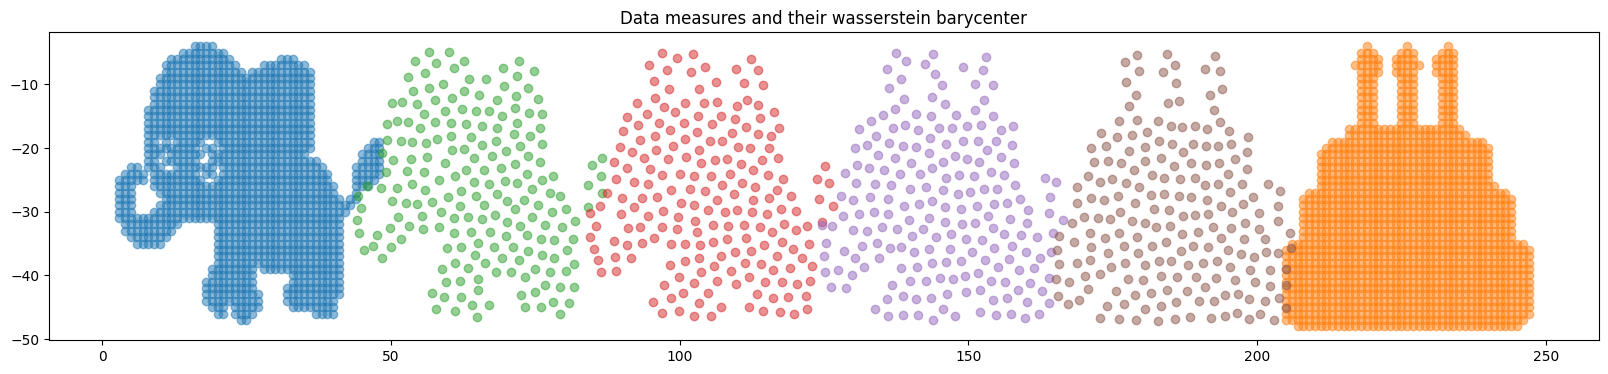

In [10]:
ALPHA = [0.2, 0.4, 0.6, 0.8]
xb = []
for a in ALPHA:
    xb.append(compute_wasserstein_barycenter([x1, x2], k = 200, X_init = None, weights = [1-a, a]))
plt.figure(6, (20, 4))
plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
plt.scatter(x2[:, 0]+200, x2[:, 1], alpha=0.5)
for i in range(len(xb)):
    plt.scatter(xb[i][:, 0]+40*i+40, xb[i][:, 1], alpha = 0.5, label='2-Wasserstein barycenter')
plt.title('Data measures and their wasserstein barycenter')
plt.show()

## **Example 2 - Projections**

In [12]:
### Load + preprocess data

image1 = preprocess_image('data/elephant.jpg', end = 'L')
image2 = preprocess_image('data/cercle.png', end = 'L')
x1 = image_to_distribution(image1, reduc=5)
x2 = image_to_distribution(image2, reduc=3)
x2 = resize_array(x2)
x2 = x2[np.random.choice(len(x2), x1.shape[0], replace=False)]

In [13]:
### Plot GIF
proj, x_all = compute_sliced_wass_barycenter_gif([x1], xbinit=x2, nb_iter_max=100, lr=1e3)
create_gif(x_all, x1, filename="outputs/projection.gif")

In [14]:
xprojection = sliced_projection(x2, x1, k=len(x2))
xprojection_simple = simple_projection(x2, x1, k=len(x2))

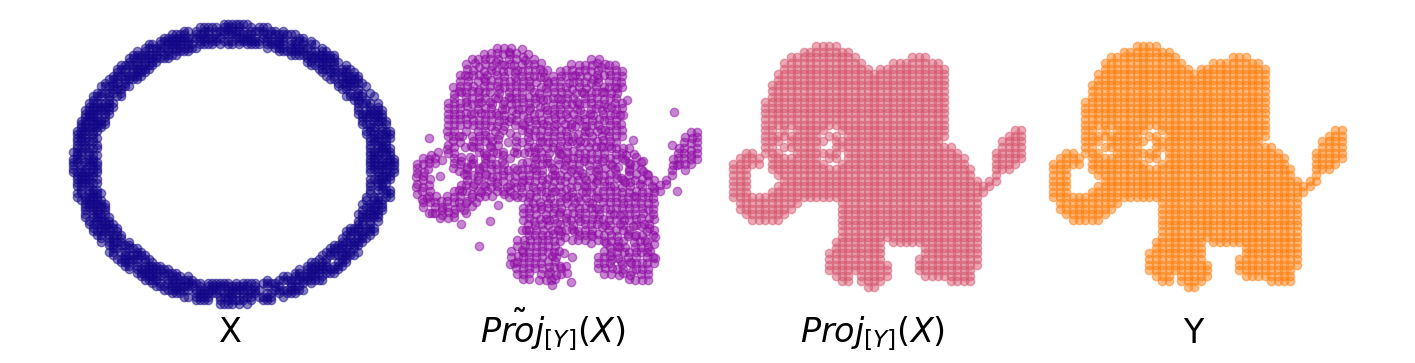

In [15]:
### Plot Report

cmap = plt.cm.plasma
colors = [cmap(i) for i in [0.01, 0.3, 0.55]] + ["#ff7f0e"]
plt.figure(6, (18, 4))

plt.scatter(x2[:, 0], x2[:, 1], alpha=0.5, label='X', color=colors[0])
plt.scatter(xprojection[:, 0] + 50, xprojection[:, 1], alpha=0.5, label='$\\tilde{Proj}_{[Y]}(X)$', color=colors[1])
plt.scatter(xprojection_simple[:, 0] + 100, xprojection_simple[:, 1], alpha=0.5, label='$Proj_{[Y]}(X)$', color=colors[2])
plt.scatter(x1[:, 0] + 150, x1[:, 1], alpha=0.5, label="Y", color=colors[3])

plt.text(np.mean(x2[:, 0]), np.mean(x2[:, 1]) - 32, 'X', ha='center', fontsize=24)
plt.text(np.mean(xprojection[:, 0] + 50), np.mean(xprojection[:, 1]) - 32, "$\\tilde{Proj}_{[Y]}(X)$", ha='center', fontsize=24)
plt.text(np.mean(xprojection_simple[:, 0] + 100), np.mean(xprojection_simple[:, 1]) - 32, '$Proj_{[Y]}(X)$', ha='center', fontsize=24)
plt.text(np.mean(x1[:, 0] + 150), np.mean(x1[:, 1]) -32, 'Y', ha='center', fontsize=24)
plt.axis("off")
plt.show()

## **Example 1 - Barycenter with multiple images**

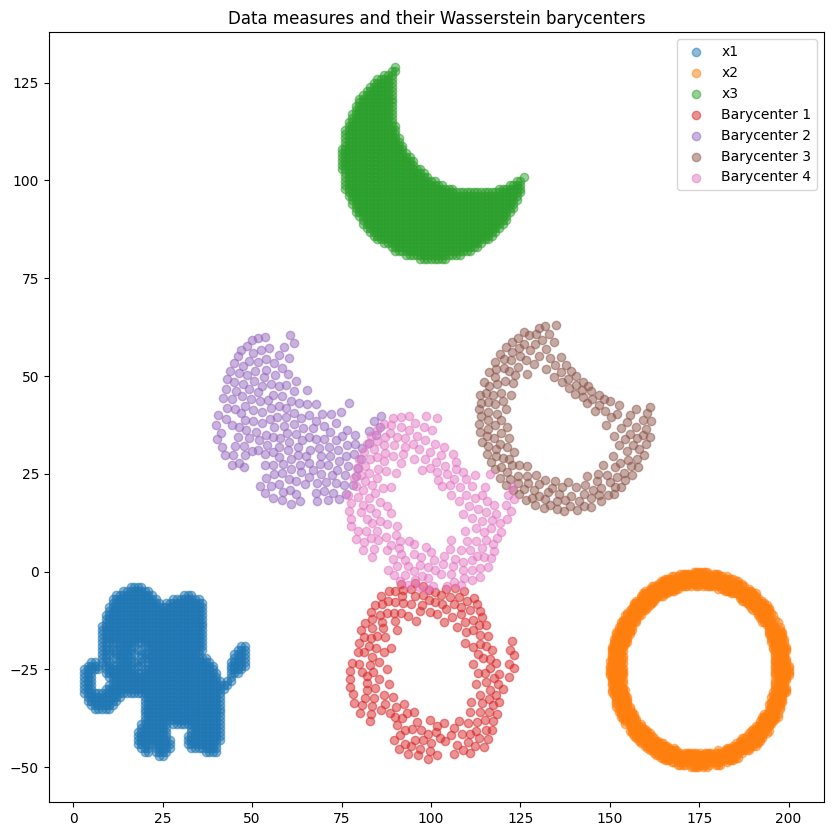

In [16]:
r = 150

weights_list = [[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5], [0.33, 0.33, 0.33]]
barycenters = [compute_wasserstein_barycenter([x1, x2, x3], k=200, X_init=None, weights=weights) for weights in weights_list]

plt.figure(figsize=(10, 10))

plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5, label="x1")
plt.scatter(x2[:, 0] + r, x2[:, 1], alpha=0.5, label="x2")
plt.scatter(x3[:, 0] + r/2, x3[:, 1] +  np.sqrt(3) * r/2, alpha=0.5, label="x3")

offsets = [(r/2, 0), (r/4,  np.sqrt(3) * r/4), (3*r/4, np.sqrt(3) * r/4), ((r+r/2)/3,  (np.sqrt(3) * r)/6)]
labels = ["Barycenter 1", "Barycenter 2", "Barycenter 3", "Barycenter 4"]

for xb, (x_offset, y_offset), label in zip(barycenters, offsets, labels):
    plt.scatter(xb[:, 0] + x_offset, xb[:, 1] + y_offset, alpha=0.5, label=label)

plt.title("Data measures and their Wasserstein barycenters")
plt.legend()
plt.show()


## **Example 2 - Wasserstein Barycenter with multiple images**

In [17]:
image1 = preprocess_image('data/elephant.jpg', end = 'L')
image2 = preprocess_image('data/gateau.png', end = 'L')
image3 = preprocess_image('data/moon.png', end = 'L')
image4= preprocess_image('data/sun.png', end = 'L')

x1 = image_to_distribution(image1, reduc=7)
x2 = image_to_distribution(image2, reduc=8)
x3 = image_to_distribution(image3, reduc=7)
x4 = image_to_distribution(image4, reduc=6)

5it [01:24, 16.90s/it]


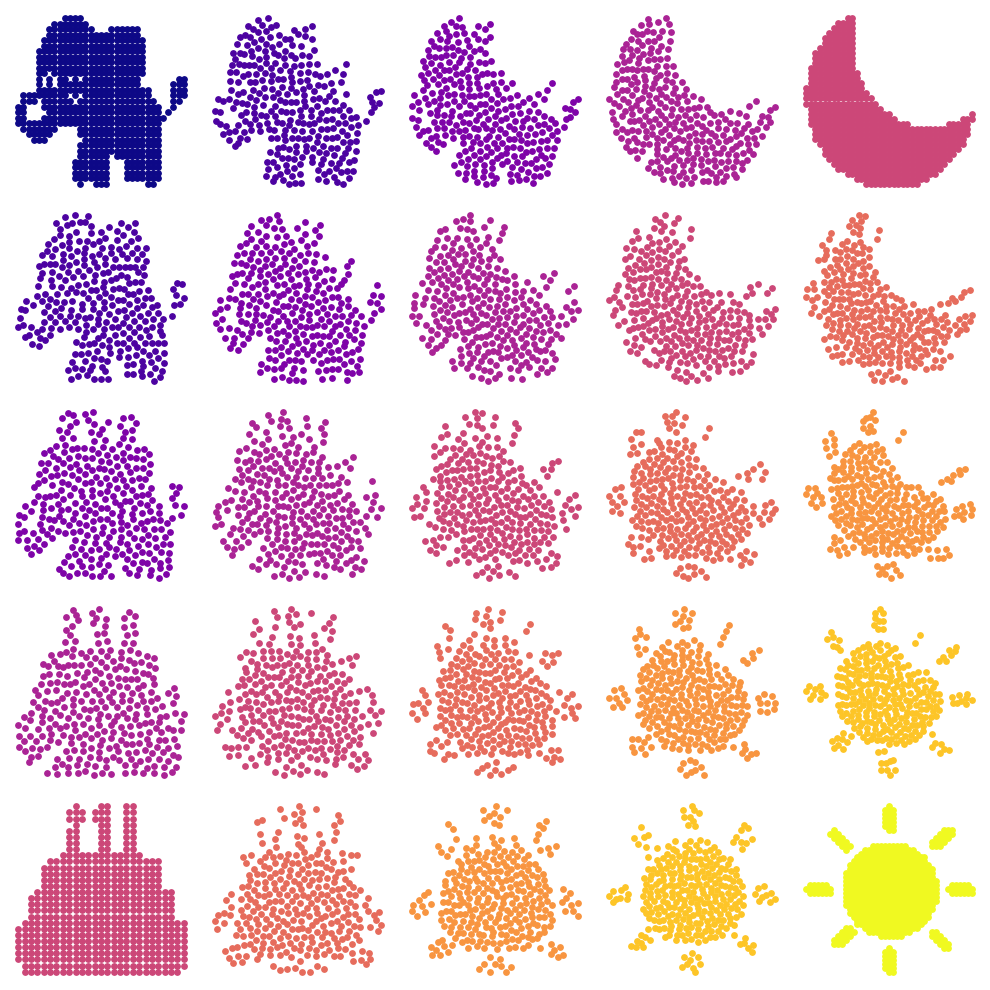

In [18]:
alphas = np.linspace(0, 1, 5)  
cmap = plt.cm.plasma  

plt.figure(figsize=(10, 10))

for i, alpha_x in tqdm(enumerate(alphas)):
    for j, alpha_y in enumerate(alphas):
        if (alpha_x, alpha_y) == (0, 0):
            data = x1
            title = "x1"
        elif (alpha_x, alpha_y) == (1, 0):
            data = x2
            title = "x2"
        elif (alpha_x, alpha_y) == (0, 1):
            data = x3
            title = "x3"
        elif (alpha_x, alpha_y) == (1, 1):
            data = x4
            title = "x4"
        else:
            weights = [(1 - alpha_x) * (1 - alpha_y), alpha_x * (1 - alpha_y),
                       (1 - alpha_x) * alpha_y, alpha_x * alpha_y]
            data = compute_wasserstein_barycenter([x1, x2, x3, x4], k=300, X_init=None, weights=weights)
            title = f"Barycenter ({alpha_x:.2f}, {alpha_y:.2f})"
        
        ax = plt.subplot(5, 5, i * 5 + j + 1)
        color = cmap(alpha_x * 0.5 + alpha_y * 0.5)  
        ax.scatter(data[:, 0], data[:, 1], s=15, color=color, alpha=1)
        ax.axis('off')  

plt.tight_layout()
plt.show()


## **Example 2 - Sliced Wasserstein Barycenter with multiple images**

0it [00:00, ?it/s]

5it [01:26, 17.24s/it]


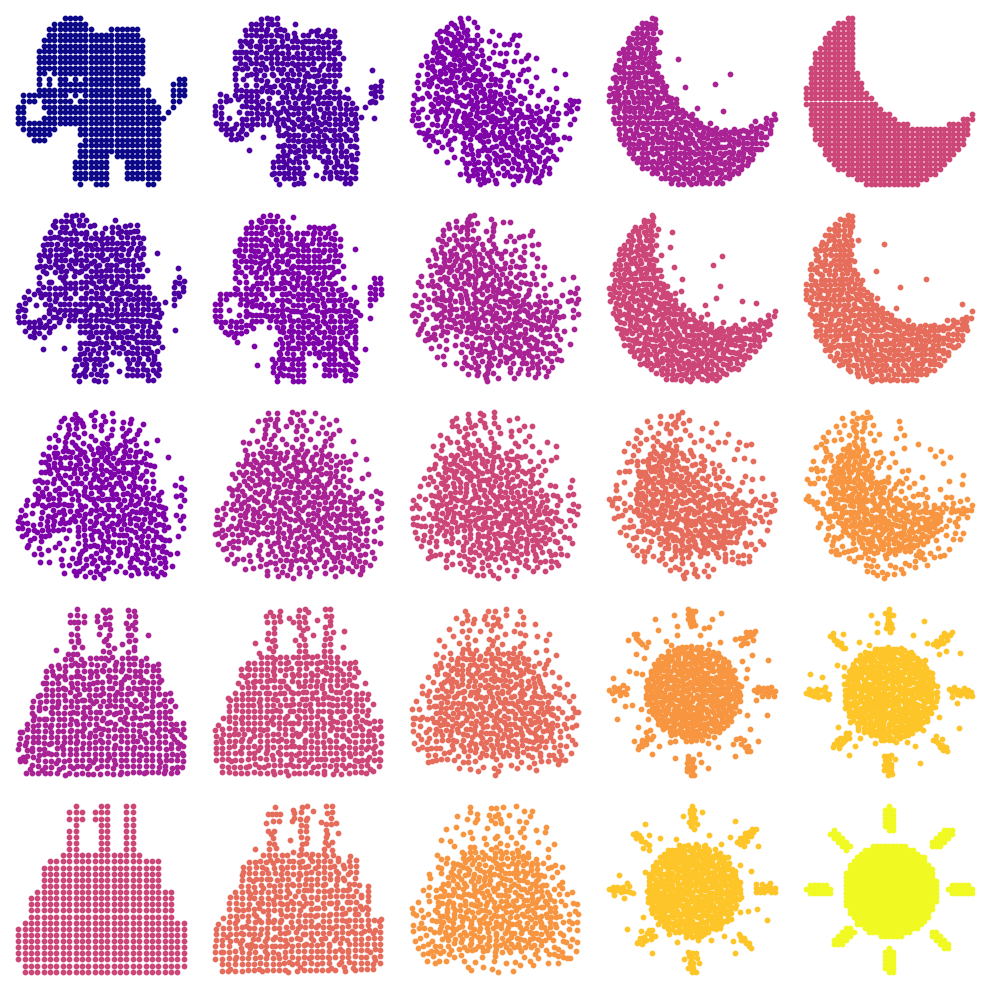

In [19]:
alphas = np.linspace(0, 1, 5)  
cmap = plt.cm.plasma  


plt.figure(figsize=(10, 10))

for i, alpha_x in tqdm(enumerate(alphas)):
    for j, alpha_y in enumerate(alphas):
        if (alpha_x, alpha_y) == (0, 0):
            data = x1
            title = "x1"
        elif (alpha_x, alpha_y) == (1, 0):
            data = x2
            title = "x2"
        elif (alpha_x, alpha_y) == (0, 1):
            data = x3
            title = "x3"
        elif (alpha_x, alpha_y) == (1, 1):
            data = x4
            title = "x4"
        else:
            weights = [(1 - alpha_x) * (1 - alpha_y), alpha_x * (1 - alpha_y),
                       (1 - alpha_x) * alpha_y, alpha_x * alpha_y]
            data, _ = compute_sliced_wass_barycenter([x1, x2, x3, x4], k=300, rho=weights)
            title = f"Barycenter ({alpha_x:.2f}, {alpha_y:.2f})"
        
        ax = plt.subplot(5, 5, i * 5 + j + 1)
        color = cmap(alpha_x * 0.5 + alpha_y * 0.5)
        ax.scatter(data[:, 0], data[:, 1], s=10, color=color, alpha=1)
        ax.axis('off')

plt.tight_layout()
plt.show()